<a href="https://colab.research.google.com/drive/1XntAKvvp8hnGg1hGjuat0fH1mLv8Xkw7?usp=sharing"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

**Let's Import necessary libraries**

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

**Dataset Used:**

Wine Dataset (Scikit Datasets)

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

In [2]:
# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Display some information about the dataset
print("Dataset shape:", X.shape)
print("Class distribution:", {label: np.sum(y == label) for label in np.unique(y)})

Dataset shape: (178, 13)
Class distribution: {0: 59, 1: 71, 2: 48}


In [3]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the standardized data
X_scaled[:5, :]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
        -0.42754369,  1.18407144,  2.33457383],
       [ 0.29570023,  0.22769377,  1.84040254,  0.45194578,  1.28198515,
         0.80899739,  0.66335127,  0.22679555,  0.40140444, -0.31927553,
         0.36217728,  0.44960118, -0.03787401]])

In [4]:
# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Display the first few rows of the PCA-transformed data
X_pca[:5, :]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082]])

In [5]:
# Fit a Gaussian Mixture Model with 3 components (assuming 3 classes in the dataset)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_scaled)

GaussianMixture(n_components=3, random_state=42)

In [6]:
# Predict the cluster labels
labels = gmm.predict(X_scaled)

In [7]:
# Display the cluster means
gmm.means_

array([[-0.94194964, -0.36665974, -0.39337021,  0.25121283, -0.57289459,
        -0.03349368,  0.08136144,  0.01323491,  0.00779434, -0.88476972,
         0.43434413,  0.29281555, -0.78131234],
       [ 0.81535193, -0.33244352,  0.2448001 , -0.67576135,  0.63685313,
         0.82213961,  0.89675273, -0.59782121,  0.61971204,  0.13188764,
         0.50056412,  0.74602428,  1.11395195],
       [ 0.16516987,  0.87143373,  0.18784666,  0.52521419, -0.07462282,
        -0.97928753, -1.21559036,  0.72599751, -0.77948503,  0.94259045,
        -1.16489416, -1.29279595, -0.4065956 ]])

Text(0.5, 1.0, 'True Labels')

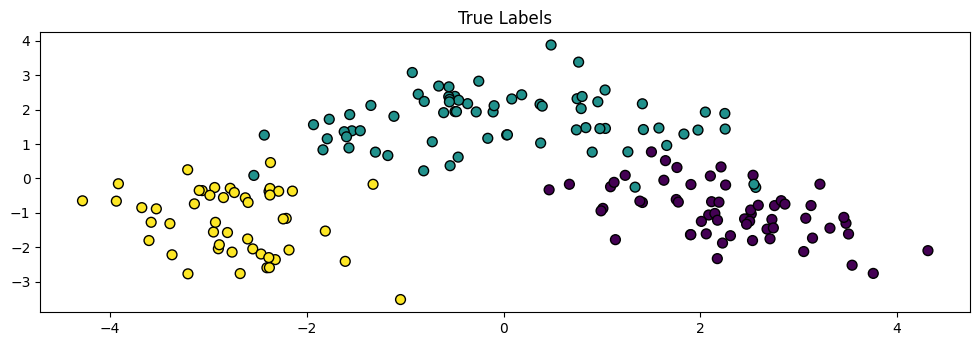

In [8]:
# Plot the results
plt.figure(figsize=(12, 8))

# Plot the true labels
plt.subplot(2, 1, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolors='k', s=50)
plt.title('True Labels')

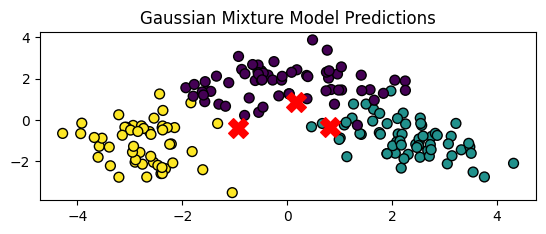

In [12]:
# Plot the predicted labels from Gaussian Mixture Model
plt.subplot(2, 1, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('Gaussian Mixture Model Predictions')
plt.show()